In [1]:
%matplotlib inline
import torch
import torchvision
import gzip
import matplotlib
import torch 
import torch.nn as nn
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

# 加载数据集

In [2]:
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)
 
test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())
 
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=60000, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=10000,
                                          shuffle=True)

In [3]:
train_images = None
train_labels = None
test_images = None
test_labels = None
for i, (images, labels) in enumerate(train_loader):
    train_images = np.array(images.squeeze(1).reshape(-1, 28*28))
    train_labels = np.array(labels)
for i, (images, labels) in enumerate(test_loader):
    test_images = np.array(images.squeeze(1).reshape(-1, 28*28))
    test_labels = np.array(labels)
train_images.shape

(60000, 784)

## 训练+预测

In [11]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
train_seg = [2000, 3000, 4000, 5000, 6000, 7000, 10000, 12500, 20000, 30000, 45000, 60000]
test_seg = [200, 300, 500, 1000, 2000, 4000, 8000, 10000]
test_acc = []
for train_segs in train_seg:
    clf = BernoulliNB()
    clf.fit(train_images[:train_segs, :], train_labels[:train_segs])
    acc = []
    for test_segs in test_seg:
        pre = clf.predict(test_images[:test_segs])
        temp = accuracy_score(pre, test_labels[:test_segs])
        acc.append(temp)
    test_acc.append(acc)
test_acc

[[0.85, 0.8333333333333334, 0.836, 0.84, 0.8285, 0.82975, 0.82775, 0.8284],
 [0.855, 0.8366666666666667, 0.84, 0.845, 0.8375, 0.8355, 0.83275, 0.8324],
 [0.855, 0.84, 0.842, 0.849, 0.84, 0.8375, 0.83825, 0.8368],
 [0.85, 0.8366666666666667, 0.838, 0.846, 0.8405, 0.83925, 0.83825, 0.8375],
 [0.84, 0.83, 0.828, 0.843, 0.839, 0.8375, 0.837625, 0.8366],
 [0.845, 0.8333333333333334, 0.834, 0.843, 0.838, 0.83625, 0.837125, 0.8366],
 [0.85, 0.84, 0.838, 0.85, 0.8415, 0.84025, 0.839375, 0.8385],
 [0.85, 0.84, 0.84, 0.852, 0.8435, 0.842, 0.8405, 0.8402],
 [0.855, 0.84, 0.84, 0.854, 0.8435, 0.8425, 0.841375, 0.841],
 [0.855, 0.8333333333333334, 0.836, 0.853, 0.8445, 0.8425, 0.841625, 0.8409],
 [0.85, 0.8366666666666667, 0.84, 0.854, 0.8415, 0.842, 0.8415, 0.8408],
 [0.855, 0.84, 0.842, 0.855, 0.841, 0.8415, 0.841375, 0.8413]]

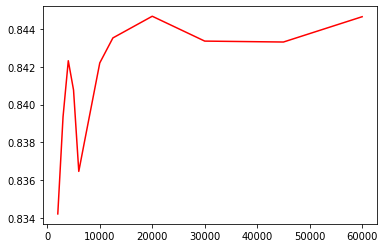

In [5]:
plt.plot(train_seg, np.mean(test_acc, axis=1), color='red')
plt.savefig('means.jpg')

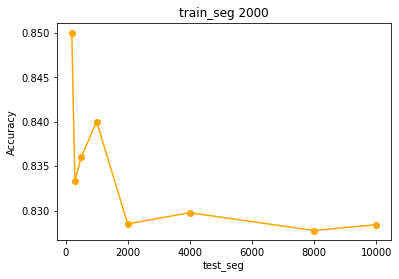

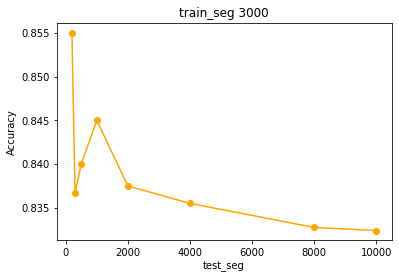

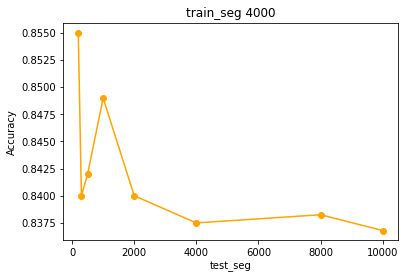

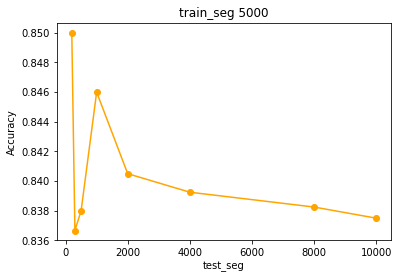

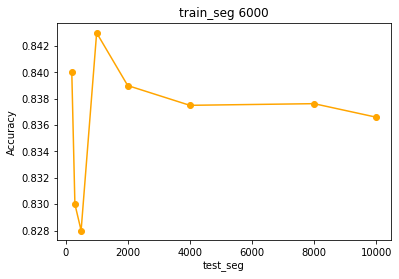

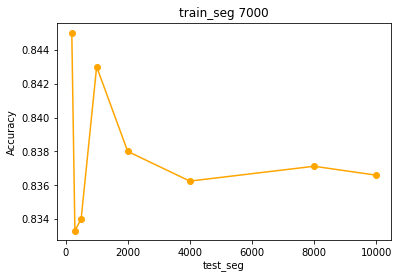

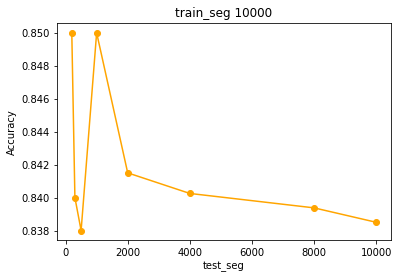

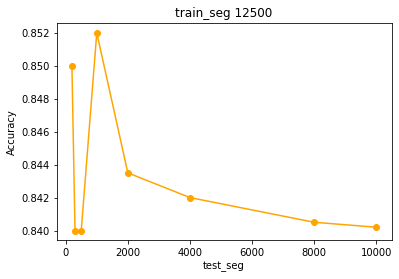

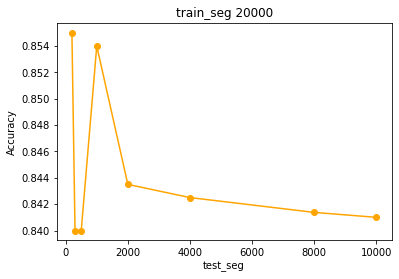

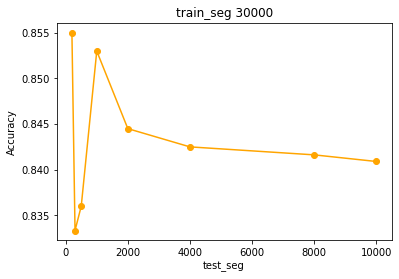

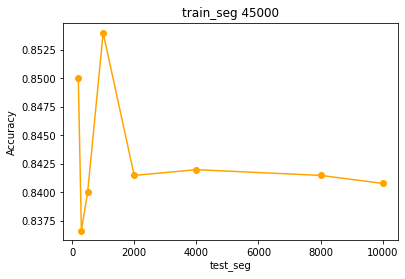

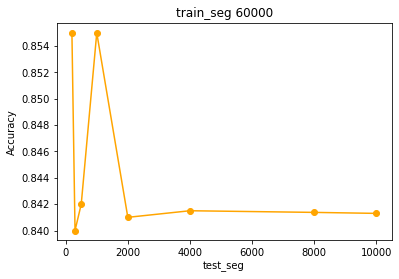

<Figure size 432x288 with 0 Axes>

In [6]:
ii = 0
for train_segs in train_seg:
    plt.plot(test_seg,test_acc[ii], color="orange", marker="o")
    plt.title('train_seg ' + str(train_segs))
    plt.xlabel('test_seg')
    plt.ylabel('Accuracy')
    name = 'train_seg ' + str(train_segs) + '.jpg'
    plt.savefig(name)
    ii += 1
    plt.show()
    plt.clf()

In [7]:
prob = clf.predict_proba(test_images)
prob[:8, :]

array([[9.98291182e-064, 6.61711775e-086, 1.00000000e+000,
        2.78617102e-030, 6.55560730e-095, 4.16155708e-037,
        1.81222975e-024, 6.59337835e-150, 5.84732291e-053,
        9.73416475e-121],
       [1.00000000e+000, 5.26892489e-225, 3.23614405e-063,
        1.18934679e-098, 2.64817064e-068, 2.11235067e-050,
        1.07922895e-068, 1.53849732e-089, 1.21729703e-095,
        1.88674111e-090],
       [8.01224205e-115, 1.00000000e+000, 1.95117393e-060,
        3.68348125e-052, 2.17620589e-070, 3.48939329e-054,
        9.26652495e-068, 1.29100688e-060, 9.29642329e-056,
        1.06981581e-058],
       [7.55517429e-060, 7.07855439e-120, 3.74905398e-036,
        1.14883461e-038, 1.23472892e-062, 9.63106906e-030,
        1.00000000e+000, 3.15536476e-127, 1.72498257e-042,
        2.73874225e-084],
       [8.16198655e-032, 8.67072479e-200, 1.88469240e-022,
        3.01268603e-057, 3.92320057e-068, 1.19061546e-049,
        1.00000000e+000, 4.71182308e-136, 2.04673736e-080,
        7.8